In [1]:
# Modelo de AM para aplicação do algoritmo LogisticRegression
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# Carregamento do banco de dados
import pandas as pd 
arquivo = pd.read_csv('C:/UCPEL/IA-ML/EEG_Eye_State_Classification.csv')

In [3]:
# Visualização do conjunto de dados (cinco primeiras amostras)
arquivo.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
# Visualização do tamanho do banco de dados
arquivo.shape

(14980, 15)

In [5]:
# Separação das variáveis preditoras (características) e da variável alvo (desfecho)
y = arquivo['eyeDetection']
x = arquivo.drop('eyeDetection', axis = 1)

In [6]:
# Criação dos conjuntos de treino e teste (aleatório)
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [7]:
# Quantidade de dados para treino
x_treino.shape

(10036, 14)

In [8]:
# Quantidade de dados para teste
x_teste.shape

(4944, 14)

In [9]:
# Criação do modelo para aplicação do LogisticRegression
for i in range(100):
    modelo = LogisticRegression(max_iter=10000, penalty='none', solver='lbfgs')
    modelo.fit(x_treino, y_treino)

    #Impressão dos resultados
    resultado = modelo.score(x_teste, y_teste)
    print("Acurácia: ", resultado)

Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia:  0.6314724919093851
Acurácia: 

In [10]:
# Determinando a acurácia na amostra de treino
score_treino = modelo.score(x_treino, y_treino)
score_treino

0.6459744918294141

In [11]:
# Realizando previsão na amostra de teste
y_previsto = modelo.predict(x_teste)
score_teste = modelo.score(x_teste, y_teste)
score_teste

0.6314724919093851

In [12]:
# Gerando Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
cm

array([[2108,  534],
       [1288, 1014]], dtype=int64)

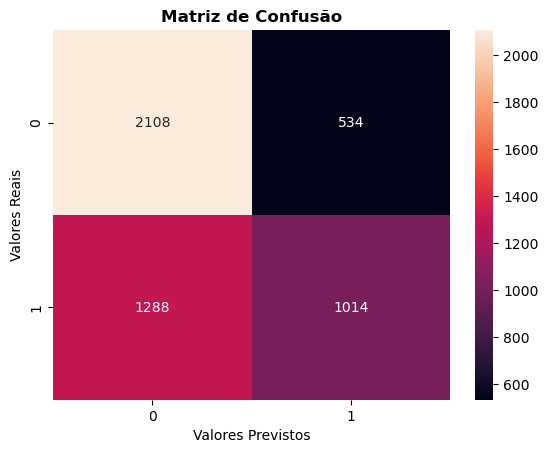

In [13]:
# Mapa de calor da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusão', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()